<a href="https://colab.research.google.com/github/badriadhikari/2019-Spring-DL/blob/master/course-content/Module2/DL_L2_Regularization_IMDB_Movie_Reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original tutorial at https://github.com/fchollet/deep-learning-with-python-notebooks/blob/master/3.5-classifying-movie-reviews.ipynb

In [1]:
import keras
from keras import models
from keras import layers
from keras import regularizers
import numpy as np
import matplotlib.pyplot as plt
from keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [0]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

## Prepare Dataset

In [0]:
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)
# Our vectorized test data
x_test = vectorize_sequences(test_data)

In [4]:
# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## The Original Training

In [6]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 173us/step - loss: 0.5084 - acc: 0.7813 - val_loss: 0.3797 - val_acc: 0.8684
Epoch 2/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.3004 - acc: 0.9047 - val_loss: 0.3004 - val_acc: 0.8897
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2179 - acc: 0.9285 - val_loss: 0.3085 - val_acc: 0.8711
Epoch 4/20
15000/15000 [==============================] - 2s 114us/step - loss: 0.1750 - acc: 0.9437 - val_loss: 0.2840 - val_acc: 0.8832
Epoch 5/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1427 - acc: 0.9543 - val_loss: 0.2841 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.1150 - acc: 0.9650 - val_loss: 0.3166 - val_acc: 0.8772
Ep

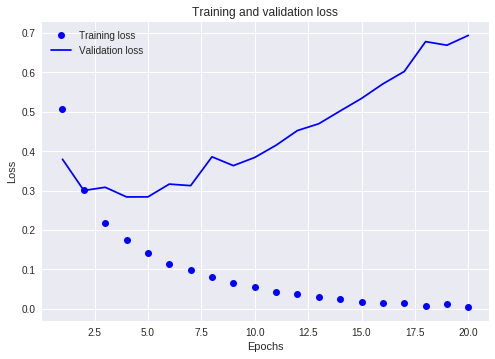

In [7]:
epochs = range(1, len(history.history['loss']) + 1)
# "bo" is for "blue dot"
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## L2 Loss with 0.001 
l2(0.001) means every coefficient in the weight matrix of the layer will add 0.001 * weight_coefficient_value to the total loss of the network

In [8]:
model_l2_001 = models.Sequential()
model_l2_001.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=(10000,)))
model_l2_001.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_l2_001.add(layers.Dense(1, activation='sigmoid'))

model_l2_001.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_l2_001 = model_l2_001.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 132us/step - loss: 0.5735 - acc: 0.7909 - val_loss: 0.4506 - val_acc: 0.8683
Epoch 2/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3787 - acc: 0.8956 - val_loss: 0.3670 - val_acc: 0.8842
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.3017 - acc: 0.9185 - val_loss: 0.3420 - val_acc: 0.8876
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2646 - acc: 0.9290 - val_loss: 0.3434 - val_acc: 0.8814
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.2396 - acc: 0.9393 - val_loss: 0.3323 - val_acc: 0.8872
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.2243 - acc: 0.9451 - val_loss: 0.3600 - val_acc: 0.8780
Epoch 7/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.2116 - acc: 0.9495 - val_loss: 0.3526 - 

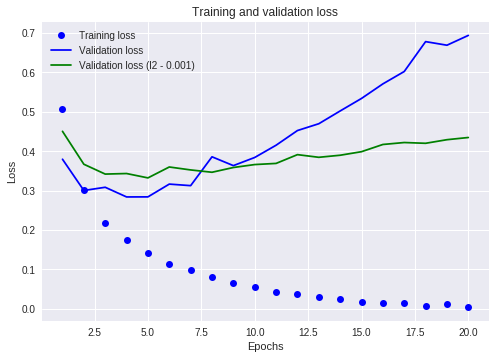

In [9]:
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.plot(epochs, history_l2_001.history['val_loss'], 'g', label='Validation loss (l2 - 0.001)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Regularize more?

In [10]:
model_l2_01 = models.Sequential()
model_l2_01.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu', input_shape=(10000,)))
model_l2_01.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.01), activation='relu'))
model_l2_01.add(layers.Dense(1, activation='sigmoid'))

model_l2_01.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_l2_01 = model_l2_01.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 129us/step - loss: 0.7795 - acc: 0.7766 - val_loss: 0.6293 - val_acc: 0.8556
Epoch 2/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.5800 - acc: 0.8743 - val_loss: 0.5657 - val_acc: 0.8606
Epoch 3/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.5213 - acc: 0.8889 - val_loss: 0.5179 - val_acc: 0.8789
Epoch 4/20
15000/15000 [==============================] - 2s 113us/step - loss: 0.4847 - acc: 0.8935 - val_loss: 0.4946 - val_acc: 0.8798
Epoch 5/20
15000/15000 [==============================] - 2s 112us/step - loss: 0.4627 - acc: 0.8938 - val_loss: 0.4882 - val_acc: 0.8723
Epoch 6/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.4397 - acc: 0.9007 - val_loss: 0.4654 - val_acc: 0.8823
Epoch 7/20
15000/15000 [==============================] - 2s 111us/step - loss: 0.4357 - acc: 0.8939 - val_loss: 0.4578 - 

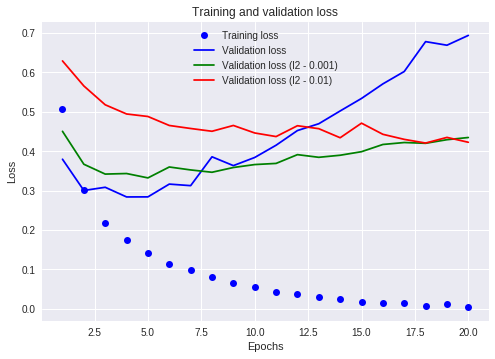

In [11]:
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.plot(epochs, history_l2_001.history['val_loss'], 'g', label='Validation loss (l2 - 0.001)')
plt.plot(epochs, history_l2_01.history['val_loss'], 'r', label='Validation loss (l2 - 0.01)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Should we regularize more or less?

In [12]:
model_l2_0001 = models.Sequential()
model_l2_0001.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.0001), activation='relu', input_shape=(10000,)))
model_l2_0001.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.0001), activation='relu'))
model_l2_0001.add(layers.Dense(1, activation='sigmoid'))

model_l2_0001.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['accuracy'])

history_l2_0001 = model_l2_0001.fit(partial_x_train, partial_y_train, epochs=20, batch_size=512, validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 147us/step - loss: 0.5338 - acc: 0.7881 - val_loss: 0.4500 - val_acc: 0.8229
Epoch 2/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.3330 - acc: 0.8987 - val_loss: 0.3257 - val_acc: 0.8790
Epoch 3/20
15000/15000 [==============================] - 2s 115us/step - loss: 0.2428 - acc: 0.9247 - val_loss: 0.2908 - val_acc: 0.8896
Epoch 4/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1932 - acc: 0.9388 - val_loss: 0.2932 - val_acc: 0.8841
Epoch 5/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1624 - acc: 0.9509 - val_loss: 0.2994 - val_acc: 0.8834
Epoch 6/20
15000/15000 [==============================] - 2s 116us/step - loss: 0.1382 - acc: 0.9600 - val_loss: 0.2988 - val_acc: 0.8861
Epoch 7/20
15000/15000 [==============================] - 2s 117us/step - loss: 0.1192 - acc: 0.9691 - val_loss: 0.3142 - 

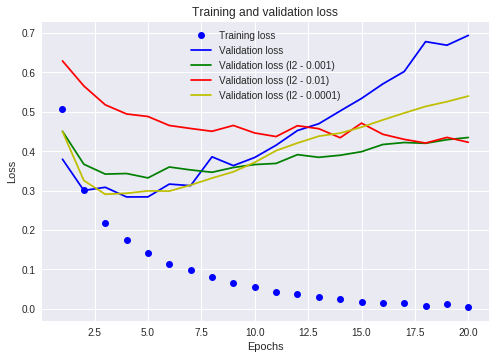

In [22]:
epochs = range(1, len(history.history['loss']) + 1)
plt.plot(epochs, history.history['loss'], 'bo', label='Training loss')
plt.plot(epochs, history.history['val_loss'], 'b', label='Validation loss')
plt.plot(epochs, history_l2_001.history['val_loss'], 'g', label='Validation loss (l2 - 0.001)')
plt.plot(epochs, history_l2_01.history['val_loss'], 'r', label='Validation loss (l2 - 0.01)')
plt.plot(epochs, history_l2_0001.history['val_loss'], 'y', label='Validation loss (l2 - 0.0001)')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()